# 🤖 Modelo Base: Regresión Logística

Entrenaremos una regresión logística como modelo inicial para predecir `SeriousDlqin2yrs`. Este modelo servirá como punto de comparación para futuros modelos más complejos.

In [7]:
# 📦 Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

X_train = joblib.load('../data/X_train.pkl')
X_test = joblib.load('../data/X_test.pkl')
y_train = joblib.load('../data/y_train.pkl')
y_test = joblib.load('../data/y_test.pkl')

In [8]:
# Entrenamiento del modelo
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

## 📊 Evaluación del modelo

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.86     27995
           1       0.18      0.75      0.30      2005

    accuracy                           0.76     30000
   macro avg       0.58      0.75      0.58     30000
weighted avg       0.92      0.76      0.82     30000


🎯 AUC-ROC: 0.8364825122405631


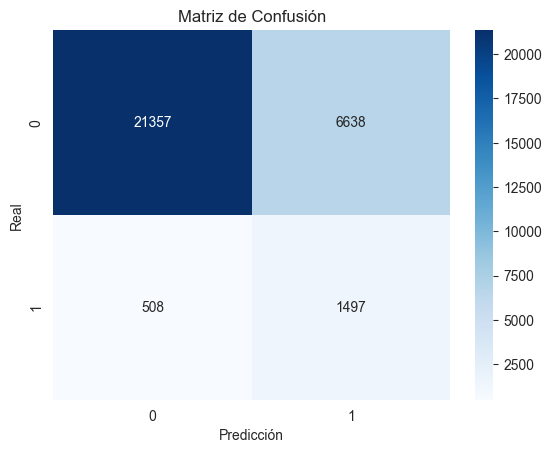

In [9]:
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🎯 AUC-ROC:", roc_auc_score(y_test, y_proba))

# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

## 📈 Curva ROC

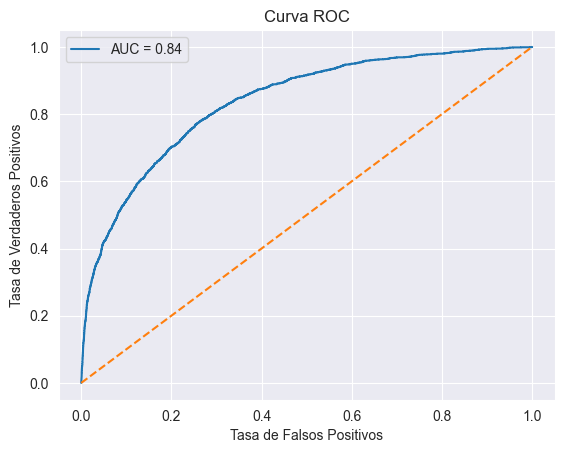

In [10]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()